In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\DATA SCIENCE COURSE\Datacience_Class\Data\Salary Data.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17436\976473327.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:\DATA SCIENCE COURSE\Datacience_Class\Data\Salary Data.csv')


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


# **About Dataset:**
This dataset contains information about the salaries of employees at a company. Each row represents a different employee, and the columns include information such as age, gender, education level, job title, years of experience, and salary.

Columns:

Age: This column represents the age of each employee in years. The values in this column are numeric.

Gender: This column contains the gender of each employee, which can be either male or female. The values in this column are categorical.

Education Level: This column contains the educational level of each employee, which can be high school, bachelor's degree, master's degree, or PhD. The values in this column are categorical.

Job Title: This column contains the job title of each employee. The job titles can vary depending on the company and may include positions such as manager, analyst, engineer, or administrator. The values in this column are categorical.

Years of Experience: This column represents the number of years of work experience of each employee. The values in this column are numeric.

Salary: This column represents the annual salary of each employee in US dollars. The values in this column are numeric and can vary depending on factors such as job title, years of experience, and education level.

** The purpose of creating this dataset is solely for educational use, and any commercial use is strictly prohibited
and this dataset was large language models generated and not collected from actual data sources.

# **Data Profiling**

In [3]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [4]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
df.describe(include='object')

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


In [6]:
# top vaneko mode ho

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


* The data has 375 entries/rows . However, each column has 373 not-null column which means 2 rows are missing.

In [8]:
# finding missing values
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [9]:
# I want to visualize the missing data
df.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [10]:
df.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
Age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gender,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Education Level,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Job Title,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Years of Experience,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Salary,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

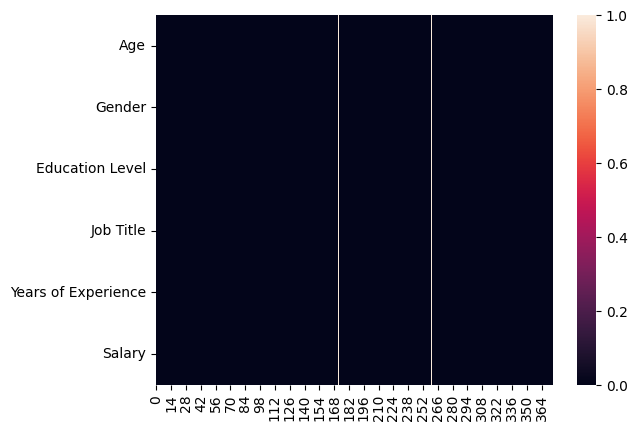

In [11]:
# ploting into heatmap
sns.heatmap(df.isna().transpose())

* The plot show 2 entirely missing rows which is white color.

In [12]:
# How to see missing rows only in dataframe
df.loc[df.isna().any(axis='columns')]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


# **missing data handling:**
## Deletion:-
* row : if target or label(y) is missing here we have salary; and if entire row is missing we drop the row.
* column : if a column conrains > 70 % data missing we drop column.


## Imputation (fill in missing value):-
* mean : data has no  outliers and normally distributed --use mean to fill in missing data.
* median : if data has outlier use median to fill in missing data.
* mode : if data(column) is categorical we use mode to fill in missing data.

## Mathematical Technique:-
* Interpolation and Extrapolation

## Algorithms:
* MIC
* Iterativelmputer
* LinearRegression
* RandomFores
* KNN

## EDA and Domain knowledge:-



In our case entire row is missing so we drop the rows.

In [13]:
# drop the missing rows
df.dropna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [14]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [15]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [16]:
# but tesle table update hudaina so we shoud use inplqace = True
df.dropna(inplace=True)

In [17]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [18]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

<Axes: >

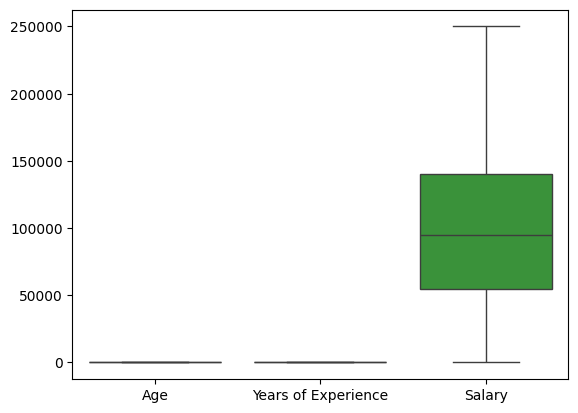

In [19]:
# boxplot of each numerical data
sns.boxplot(df)

<Axes: xlabel='Age', ylabel='Count'>

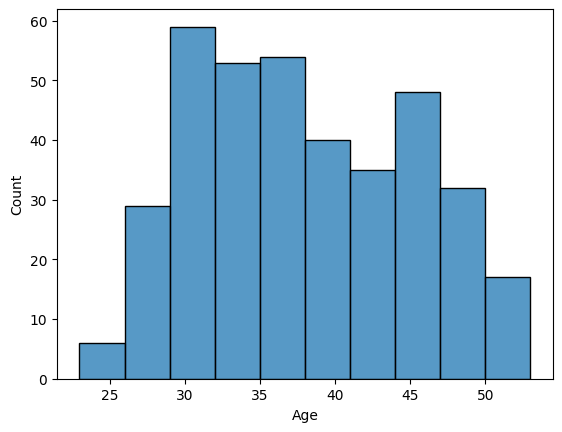

In [20]:
# ploting histogram of numerical data
sns.histplot(df['Age'])

<Axes: xlabel='Salary', ylabel='Count'>

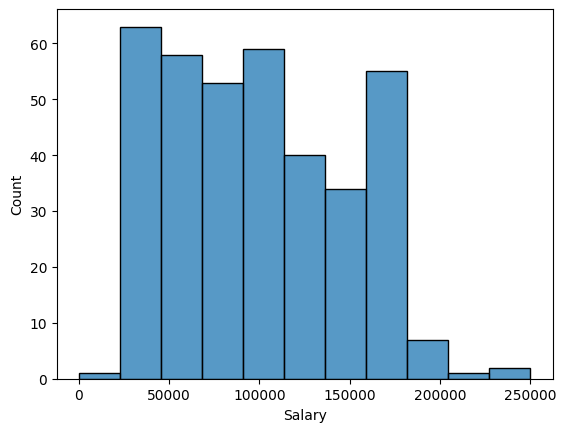

In [21]:
sns.histplot(df['Salary'])

In [22]:
df_salary=df['Gender'].nunique()
df_salary

2

In [23]:
df_gender=df['Gender'].unique()
df_gender

array(['Male', 'Female'], dtype=object)

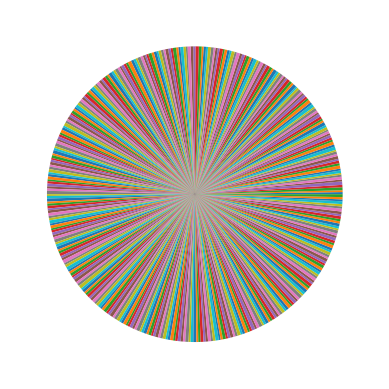

In [24]:
# plotting the pie chart
plt.pie(df['Age'])
plt.show()

In [25]:
df.head(1)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0


In [26]:
gender=df.describe(include='object')
gender

,Gender,Education Level,Job Title
count,373,373,373
unique,2,3,174
top,Male,Bachelor's,Director of Marketing
freq,194,224,12


In [27]:
df.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374],
      dtype='int64', length=373)

In [28]:
df.values

array([[32.0, 'Male', "Bachelor's", 'Software Engineer', 5.0, 90000.0],
       [28.0, 'Female', "Master's", 'Data Analyst', 3.0, 65000.0],
       [45.0, 'Male', 'PhD', 'Senior Manager', 15.0, 150000.0],
       ...,
       [29.0, 'Female', "Bachelor's", 'Junior Project Manager', 2.0,
        40000.0],
       [34.0, 'Male', "Bachelor's", 'Senior Operations Coordinator', 7.0,
        90000.0],
       [44.0, 'Female', 'PhD', 'Senior Business Analyst', 15.0, 150000.0]],
      dtype=object)

In [29]:
# ploting the pie chart of the categorical data's


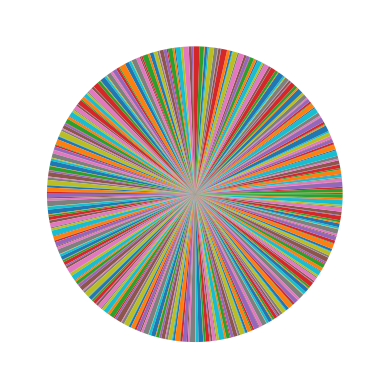

In [30]:

plt.pie(df['Years of Experience'])
plt.show()

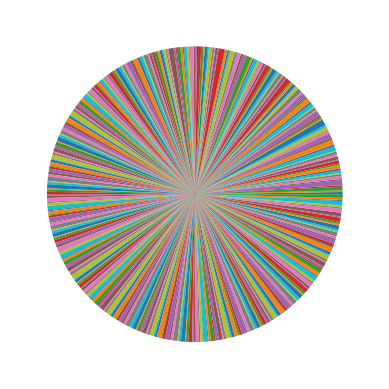

In [31]:
plt.pie(df['Salary'])
plt.show()

# Indentifying Depended and Independed variable :
 Depended variable : Salary
 Independent variable : Age, Gender, Job Title, Years of Exprience, Education Level


 `To predict salary we might not always need every Independend variable. we can select few features based on some feature selection Technique. Since it is a regression problem (y or Salary is continuous data) y should always be correlated with x. We can use Heatmap visualize correlation and select the Features .`

# **Feature Selection:**

In [32]:
df.corr(numeric_only=True)

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


In [33]:
# df.corr()

<Axes: >

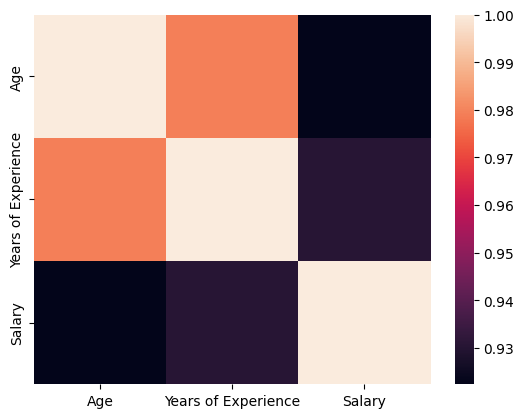

In [34]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: >

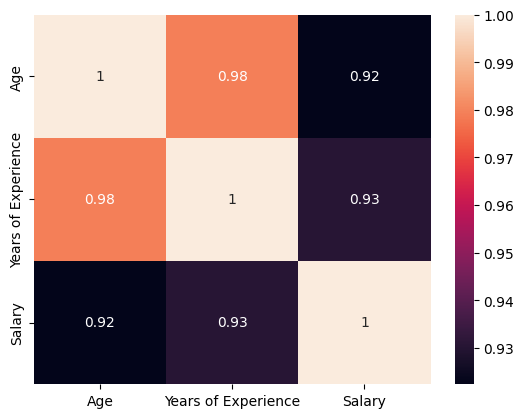

In [35]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

* The target y or salary  has positive correlation 0.92 with Age .
* The target y or salary  has positive correlation 0.93 with years of Exprience.

Therefore, Age and Years of Exprience is good predictor variable of Salary. However, Age and years of Exprience themselves are also correlated value 0.98. Which means two independed variable are correlated. It is a problem of multi-colinarity.


Here, one independet variable predicts other i.e Age can predict Years of experince and vice versa. Therefore , it makes no sense to include both of them as independet variable to predict salary. Hence , we drop one column .

We want to drop one either Age or years of Exprience column but which one ?
* reason 1 : Years of Exprience is more correlated with Salary than Age.
* Reason 2 : Years of Exprience is easily availabel in inference time. i.e. you can just ask a candidate their years of exprience but you can not ask their age with ease.

In [36]:
df.head(1)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0


In [37]:
X = df[["Years of Experience"]] # independent variable
y = df.Salary # Dependent variable

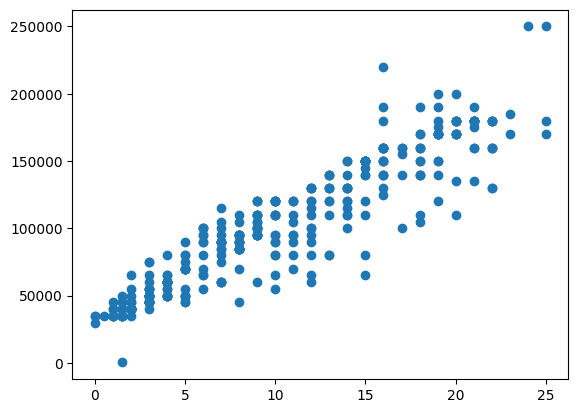

In [38]:
plt.scatter(x=X, y=y)

# Train test split

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

<img src="https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_train-test-split_0.jpg">

In [39]:
# over fitiing vaninxa goknu lai


In [40]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state is seed. test_size =0.2 means 20% test data

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
 model = LinearRegression()
 model.fit(X_train,y_train)

LinearRegression()

# Prediction

In [43]:
y_pred=model.predict(X_test)

# Evaluation

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [45]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae= mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2= r2_score(y_true=y_test, y_pred=y_pred)

In [46]:
print("MSE:",mse)
print("MAE:",mae)
print("r2:",r2)

MSE: 241834883.8999349
MAE: 12094.170341194764
r2: 0.8991338517367767


# Visualization

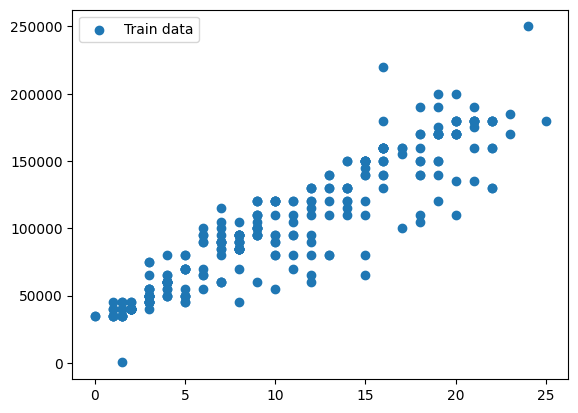

In [47]:
plt.scatter(X_train,y_train,label='Train data')
plt.legend()


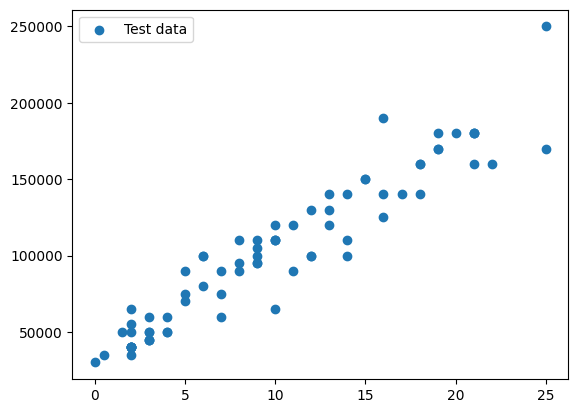

In [48]:
plt.scatter(X_test,y_test,label="Test data")
plt.legend()

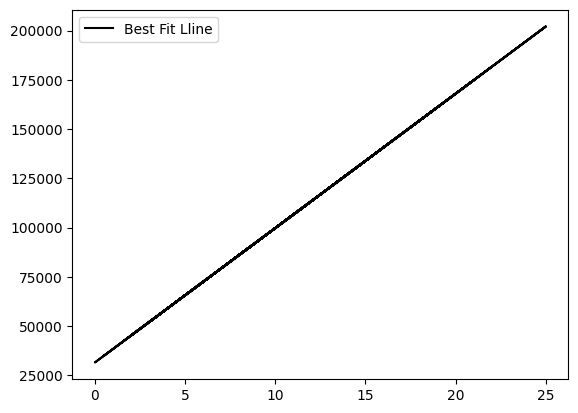

In [49]:
plt.plot(X_test,y_pred,label="Best Fit Lline",color="black")
plt.legend()

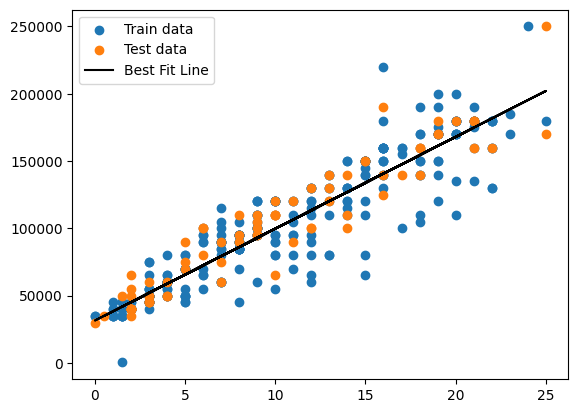

In [50]:
plt.scatter(X_train,y_train,label="Train data")
plt.scatter(X_test,y_test,label="Test data")
plt.plot(X_test,y_pred,label="Best Fit Line",color="black")
plt.legend()
plt.show()

In [51]:
m=model.coef_
c=model.intercept_

In [52]:
print(f'slope : ',m)
print(f'intercept :',c)

slope :  [6822.59017499]
intercept : 31521.077620206008


In [53]:
#  Q> If a person has 5 years of exprience then what should be his/her salary?
model.predict([[5]])

c:\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65634.02849515])

# **Serialization :**
Serialization refers to the process of converting a data object (e.g., Python objects, Tensorflow models) into a format that allows us to store or transmit the data and then recreate the object when needed using the reverse process of deserialization.

There are different formats for the serialization of data, such as JSON, XML, HDF5, and Python’s pickle, for different purposes. JSON, for instance, returns a human-readable string form, while Python’s pickle library can return a byte array.


In [54]:
import pickle

`hamile sadhai code lekhera salary prediction garna garo hunxa tesaile hamile app banauau pickle bata main`

In [55]:
with open('model.pickle','wb') as file:
    pickle.dump(model,file)

# **Multiple Linear Regression :**


In [56]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


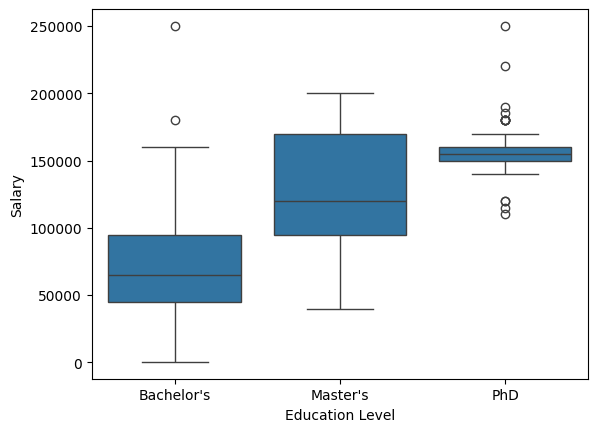

In [57]:
# both categorical and numerical present garna sakine boxplot ho so,
sns.boxplot(x='Education Level',y='Salary', data=df) # salary lai education level ra years of experience le affect garxa so pahile hamile years of exprience ko modle garyeu so ahile education level bata garxau then we can able to know which model is best 
plt.show()

In [58]:
# The average median salary of Bachlors masters and phd is different ; Education Level affect salary

In [59]:
X = df.loc[:, ['Years of Experience', 'Education Level']]
y = df.Salary

In [60]:
X = df.loc[:, ['Years of Experience', 'Education Level']]
y = df.Salary

In [61]:
X.head()

,Years of Experience,Education Level
0,5.0,Bachelor's
1,3.0,Master's
2,15.0,PhD
3,7.0,Bachelor's
4,20.0,Master's


## Encoding Categorical data to Numerical :-
* One hot encoding
* label encoding
* ordinal encoding
* count encoding
* frequency encoding


`LabelEncoder :-`


In [62]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [63]:
encoder.fit_transform(df['Education Level'])

array([0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0,

In [64]:
df.head(2)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0


In [65]:
# but now i want to add give label of each data by adding education column in X variable/data
encoder.fit_transform(X['Education Level'])

array([0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 0,
       1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2,
       0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0,
       2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0,

In [66]:
X.head(3)

,Years of Experience,Education Level
0,5.0,Bachelor's
1,3.0,Master's
2,15.0,PhD


In [67]:
X['Education']=encoder.fit_transform(X['Education Level'])

In [68]:
X.head()

,Years of Experience,Education Level,Education
0,5.0,Bachelor's,0
1,3.0,Master's,1
2,15.0,PhD,2
3,7.0,Bachelor's,0
4,20.0,Master's,1


In [69]:
# Now i want drop Education Level  kinavane malai thaha xa 0 vaneko Bachelor's , 1 vaneko Master's and 2 vaneko PhD ho vanera through LabelEncoding so,
del X['Education Level']


In [70]:
X.head()

,Years of Experience,Education
0,5.0,0
1,3.0,1
2,15.0,2
3,7.0,0
4,20.0,1


In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42) # random_state is seed, test_size = 0.2 means 20% test data

In [72]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test)

In [74]:
y_pred

array([171176.35161166,  92532.96801718, 127812.75112317,  82976.89384667,
       161620.27744116, 167500.24129216, 163092.53422917, 106496.74925067,
        51373.22106018, 100616.78539967, 138100.42203716, 157212.57037817,
        45493.25720918,  86653.00416618, 116052.82342117,  51373.22106018,
        63133.14876218,  56517.05651717,  74893.07646418,  94736.82154867,
       120460.53048416, 100616.78539967, 155740.31359016,  63133.14876218,
        82976.89384667,  57253.18491118, 167500.24129216,  45493.25720918,
       124136.64080367, 159416.42390966,  51373.22106018, 130016.60465467,
        51373.22106018, 149860.34973916,  92532.96801718,  36673.31143268,
       185140.13284516,  45493.25720918, 167500.24129216,  57253.18491118,
        45493.25720918,  86653.00416618, 180732.42578217, 159416.42390966,
        45493.25720918, 155740.31359016, 126340.49433516,  59457.03844267,
        45493.25720918,  45493.25720918, 159416.42390966,  80773.04031518,
       110172.85957017, 1

In [75]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
r2 = r2_score(y_true=y_test,y_pred=y_pred)

In [76]:
print("MSE:",mae)
print("MAE:",mae)
print("R2:",r2)

MSE: 11104.794251635842
MAE: 11104.794251635842
R2: 0.9023986325841762


In [77]:
# r2 means accuracy

In [78]:
import pickle

In [ ]:
with open("model_yoe_el.pickle","wb") as file:
    pickle.dump(model,file)